In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False
# 한글 깨지지 않도록 글씨체 설정
plt.rcParams['font.family'] = 'SeoulHangang'

## Video Game Sales
https://www.kaggle.com/gregorut/videogamesales

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

In [2]:
vgsales=pd.read_csv('vgsales.csv')
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 1. 장르별 출시 게임 수

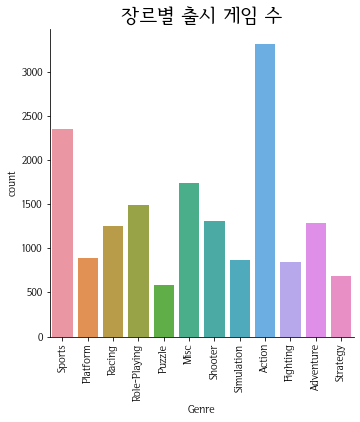

In [4]:
a= sns.catplot(x='Genre',data=vgsales,kind='count')
a.set_xticklabels(rotation=90)
plt.title('장르별 출시 게임 수',fontsize=20)
plt.show()

Action 장르의 게임이 가장 많이 출시

## 2. 연도별 비디오게임 시장 매출

In [5]:
year_sales=vgsales[['Year','Global_Sales']].groupby('Year',as_index=False).sum()
year_sales.head()

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


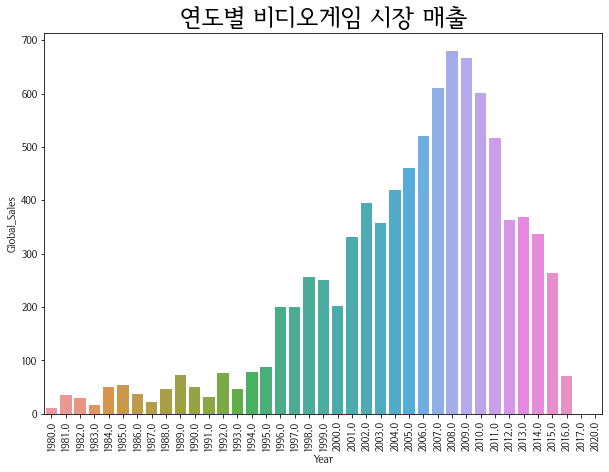

In [6]:
fig,ax=plt.subplots(figsize=(10,7))
sns.barplot(x='Year',y='Global_Sales',data=year_sales,
            ci=None)
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=90)
ax.set_title('연도별 비디오게임 시장 매출',fontsize=25)
plt.show()

2008년에 정점찍고 2010년 이후부터 하락세

## 3. 각 나라별 비디오게임 판매량 상관관계
- North America, Europe, Japan

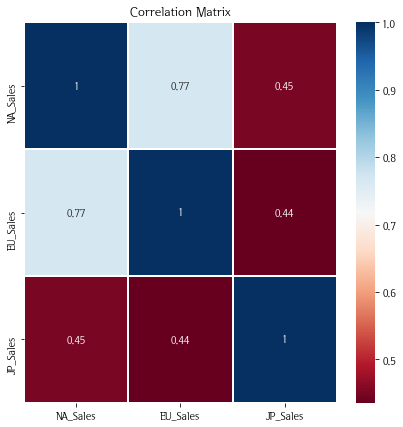

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
a = sns.heatmap(vgsales[['NA_Sales','EU_Sales','JP_Sales']].corr(),
                annot=True, linewidths=1, cmap='RdBu')
# annot: 네모 안에 값 넣을지 말지
# linewidths: 네모 간 간격
ax.set_title('Correlation Matrix')
plt.show()

북미와 유럽시장은 유사한 판매 경향을 보이나, 일본은 다소 다른 경향을 보임